In [2]:
from twod_diskmodel import *
# Check if it is office computer or laptop and set path of imfits accordingly
if current_path.split(sep=':')[0] == 'D':                           # Office computer
    print("In office")
    sys.path.append("D:\L1489_IRS_ssp\imfits")
else:                                                               # Laptop N
    sys.path.append("E:/Mihir_new/ASIAA-SSP/imfits/")

from imfits import Imfits
from imfits.drawmaps import AstroCanvas
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

e:\Mihir_new\ASIAA-SSP\DiskModel


In [3]:
%matplotlib widget

In [19]:
Ic, rc, beta, gamma = [1., 600., 1.5, 1.] # rc 
inc = 69.
pa = 0.
ms = 1.6
vsys = 7.3

model = SSDisk(Ic, rc, beta, gamma, inc, pa, ms, vsys)

# object
f_cube = 'uid___A002_b_6.cal.l1489_irs.spw_1_7.line.cube.clean.c_baseline_0.image.pbcor.Regridded.Smoothened.fits'
dist = 140.
f_PV = 'uid___A002_b_6.cal.l1489_irs.spw_1_7.line.cube.clean.c_baseline_0.image.pbcor.Regridded.Smoothened.PV_69_w1.fits'

# --------- main ----------
# read fits file
cube = Imfits(f_cube)
cube.trim_data([-9., 9.,], [-9.,9.])   # trim_data([RA range in arcsec offset from center], [Dec range], [offset velocity range in kmps])

xx = cube.xx * 3600. * dist # in au
yy = cube.yy * 3600. * dist # in au
v = cube.vaxis # km/s
print(v-7.2)
modelcube = model.build_cube(xx, yy, v, cube.beam, 0.5, dist)
vmin, vmax = np.nanmin(modelcube)*0.5, np.nanmax(modelcube)*0.5

The third axis is  FREQ
Convert frequency to velocity


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


[-8.15999994 -7.9516462  -7.74329246 -7.53493872 -7.32658499 -7.11823125
 -6.90987751 -6.70152377 -6.49317003 -6.28481629 -6.07646255 -5.86810881
 -5.65975507 -5.45140133 -5.24304759 -5.03469385 -4.82634011 -4.61798637
 -4.40963263 -4.20127889 -3.99292515 -3.78457141 -3.57621767 -3.36786393
 -3.15951019 -2.95115645 -2.74280271 -2.53444897 -2.32609523 -2.11774149
 -1.90938775 -1.70103401 -1.49268027 -1.28432653 -1.07597279 -0.86761905
 -0.65926531 -0.45091157 -0.24255783 -0.03420409  0.17414965  0.38250339
  0.59085713  0.79921087  1.00756461  1.21591835  1.42427209  1.63262583
  1.84097957  2.04933331  2.25768705  2.46604079  2.67439453  2.88274827
  3.09110201  3.29945575  3.50780949  3.71616323  3.92451697  4.13287071
  4.34122444  4.54957818  4.75793192  4.96628566  5.1746394   5.38299314
  5.59134688  5.79970062  6.00805436  6.2164081 ]
Delv =  0.20835373982064742


(70, 299, 299)
Shape of pv model (70, 299)
Convert frequency to velocity
Shape of observed pv (1, 70, 301)
(70, 299)
(70, 299)


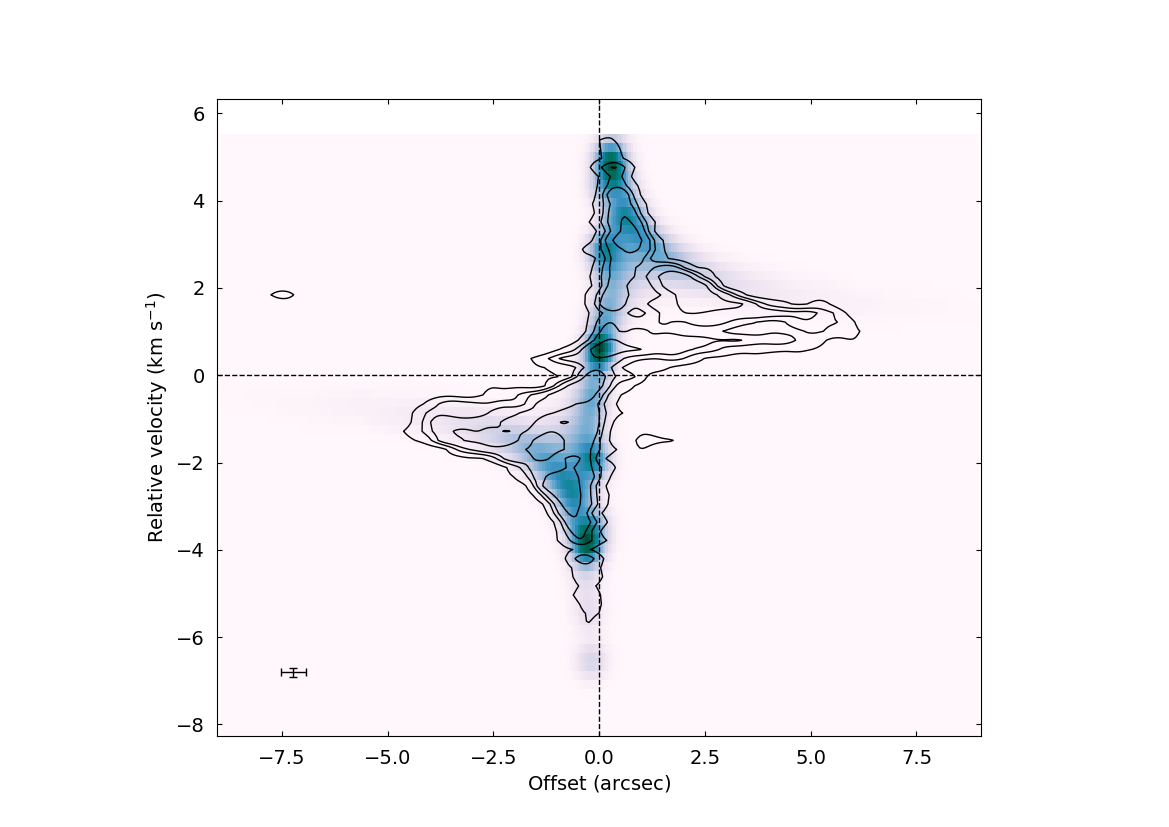

In [24]:
# Let's get PV plot out of the modelcube  
print(np.shape(modelcube))
pv_model = np.squeeze(modelcube[:, :, 150])

print("Shape of pv model",np.shape(pv_model))

# plot modelcube on top of observed cube (as contours)

plot_cube = False

if plot_cube:
    canvas = AstroCanvas((4,7),(0,0), imagegrid=True)
    canvas.channelmaps(cube, contour=True, color=False,
                        coord_center='04h04m43.07s 26d18m56.30s',
                        clevels = np.array([-3, 3.,6.,9.,12.,15])*7e-3)

    for i, im in enumerate(modelcube):      #   Plotting model as image as raster
        if i < len(canvas.axes):
            ax = canvas.axes[i]
            ax.pcolormesh(xx / dist, yy / dist, im, shading='auto', rasterized=True,
                vmin = vmin, vmax = vmax, cmap='PuBuGn')
        else:
            break
    plt.show()

plot_PV = True
if plot_PV:

    pv_obs = Imfits(f_PV, pv=True)

    print("Shape of observed pv", np.shape(pv_obs.data))
    rms_pv = pv_obs.estimate_noise()

    canvas = AstroCanvas((1,1))
    pv_plot = canvas.pvdiagram(pv_obs,
                vrel = True,
                color = False,
                #cmap = 'inferno',
                vmin = -2.0,
                vmax = 14.0,
                contour = True,
                clip = 0.0000000,
                #ylim = [-8.5,6.5],
                clevels = np.array([3,7,10,15,25,35,45])*rms_pv,
                x_offset = True, # If true, offset (radial distance from star) will be the x axis
                vsys = 7.2, # systemic velocity in kmps
                ln_var = True, # plot vertical center (systemic velocity)
                ln_hor = True, # plot horizontal center (zero offset)
                #cbaroptions = ('right', '3%', '3%'),
                #cbarlabel = r'(Jy beam$^{-1})$',
                colorbar = False 
                )

    #print(xx[0,:]/(dist))
    X, Y = np.meshgrid(-yy[:,0]/(dist), v-8.0)
    print(np.shape(X))
    print(np.shape(Y))
    ax = canvas.axes[0]
    ax.pcolormesh(X, Y, pv_model, shading='auto', rasterized=True,
                    cmap='PuBuGn')
    #plt.xlim(-14,14)
    #plt.ylim(-14,14)
    plt.show()